# 内容提要
- 非监督学习概述
- 降维算法
  - 主元分析法
  - 非线性降维与流形学习
- 聚类算法
  - k-means方法
  - “边界软化”: Gaussian混合模型(GMM)

# 非监督学习概述

$\quad$与监督学习不同, **非监督学习**(unsupervised learning)旨在挖掘高维数据分布中的内在结构, 所使用的训练数据集$\mathcal{D} = \{\mathbf{x}^{(n)}\}_{n=1}^N$只有特征, 没有“标签”(或说“正确答案”). 从概率视角来看, 监督学习与非监督学习的区别在于:
- 监督学习所拟合的概率分布为**条件分布**$p(\mathbf{t}|\mathbf{x})$;
- 非监督学习直接刻画数据特征本身的分布$p(\mathbf{x})$.

$\quad$我们将讨论两种典型的非监督学习任务, 分别是:
- **降维**(dimensionality reduction), 学习从高维数据$\mathbf{x} \in \mathbb{R}^D$到低维数据$\mathbf{z} \in \mathbb{R}^M$的(参数化)映射$f(\mathbf{x}; \boldsymbol{\theta})$, 使得尽可能少地损失高维空间中的信息;
  - 常见应用场景: 数据可视化、提高算法效率与稳健性、……
- **聚类**(clustering), 基于数据样本$\mathbf{x} \in \mathbb{R}^D$之间的相似性, 对各样本分配类别标签$z$, 相似样本归为一类.
  - 常见应用场景: 群体的分割、新闻聚合、蛋白构象的提取、……

也可以在统一的框架下认识这两种任务: 非监督学习模型试图学习某种隐变量$\mathbf{z}$. 聚类算法中的隐变量是离散的类别标签, 降维算法中的隐变量则是数据在一个低维连续空间中的**表示**(representation).

# 降维算法

$\quad$本节总假定输入数据$\mathbf{X}$做了中心化处理: 减去特征的均值, 使得每个特征的新均值为0.

## 主元分析法

$\quad$最简单的映射函数是线性函数! 借用**自编码器**(autoencoder)模型中的术语, 我们取**编码器**(encoder function, 用于数据降维)$f_\mathrm{E}(\mathbf{x}) := \mathbf{W}^\mathrm{T}\mathbf{x}$, **解码器**(decoder function, 用于从低维数据重构出高维数据)$f_\mathrm{D}(\mathbf{z}) := \mathbf{W}\mathbf{z}$, 并试图最小化重构误差. 于是, 定义“损失函数”为下述的**畸变函数**(distortion function):
$$\begin{aligned}
\mathcal{L}(\mathbf{W}) &:= \frac{1}{N}\sum_{n=1}^N{\|\mathbf{x}^{(n)} - f_\mathrm{D}(f_\mathrm{E}(\mathbf{x}^{(n)}))\|^2}\\
&= \frac{1}{N}\|\mathbf{X} - \mathbf{Z}\mathbf{W}^\mathrm{T}\|_F^2,
\end{aligned}$$
其中, $\|\cdot\|_F$为矩阵的**Frobenius范数**(Frobenius norm), 定义为所有矩阵元的平方和的算术平方根. 这就是**主元分析**(principal component analysis, PCA)的基本思想.

- 理论课上已经证明, 最优矩阵$\mathbf{W}^* \in \mathbb{R}^{D \times M}$应取为协方差矩阵$\Sigma := \mathbf{X}^\mathrm{T}\mathbf{X}$的前$M$个主本征向量$\mathbf{U}_M$. 即: **PCA依靠数据空间的旋转变换与投影降维, 最大程度地保留数据方差**.
  - 算法实践中, 更稳健的做法是构造**相关矩阵**(correlation matrix)而非协方差矩阵, 这相当于做了数据的重标度.
- 从概率论视角, PCA问题还可以等价地做如下描述: 我们假设隐变量$\mathbf{z}$服从标准正态分布, 而从$\mathbf{z}$出发重构出的$\mathbf{x}$服从以$\hat{\mathbf{x}} = \mathbf{W}\mathbf{z}$为中心的条件Gaussian分布. 即:
  $$\begin{aligned}
  p(\mathbf{z}) &= \mathcal{N}(\mathbf{z} | \mathbf{0}, \mathbf{I}),\\
  p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) &= \mathcal{N}(\mathbf{x} | \mathbf{W}\mathbf{z}, \sigma^2\mathbf{I}).\\
  \Rightarrow p(\mathbf{x} | \boldsymbol{\theta}) &= \int{\mathrm{d}\mathbf{z}p(\mathbf{z})p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})}\\
  &= \mathcal{N}(\mathbf{x} | \mathbf{0}, \mathbf{W}\mathbf{W}^\mathrm{T} + \sigma^2\mathbf{I}).
  \end{aligned}$$
  此时, 可以证明, 极大似然估计将给出下述形式的最优解:
  $$
  \mathbf{W}^* = \arg{\min_\mathbf{W}{\mathrm{NLL}(\mathbf{W}; \sigma^2)}} = \mathbf{U}_M(\mathbf{\Lambda}_M - \sigma^2\mathbf{I})^{\frac{1}{2}},
  $$
  其中, $\mathbf{U}_M$为数据$\mathbf{x}$的协方差矩阵$\Sigma$的前$M$个主本征向量, $\mathbf{\Lambda}$为前$M$个主本征值构成的对角阵, 也即:
  $$
  \mathbf{\Sigma} = \mathbf{U}^\mathrm{T}\mathbf{\Lambda}\mathbf{U}.
  $$
  的左上方$M \times M$子块.
  - PCA操作使得协方差矩阵对角化, 消除各个分量之间的相关性.
  - 若取零噪声极限$\sigma^2 \to 0$, 则$\mathbf{W}^* = \mathbf{U}_M\mathbf{\Lambda}_M^{\frac{1}{2}}$恰好就是PCA问题的解!

$\quad$诸如PCA一类的降维算法往往基于矩阵分解(例如上述的本征值分解), 它们都封装在[`sklarn.decomposition`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)模块中. 以[`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca)为例, 主要的调用接口包括:
- 模型创建`pca = PCA()`, 需传入参数`n_components`, 代表隐空间维数$M$.
  - 默认情形下取$M=D$, 即: 只对特征作“旋转变换”但不作低维截断、保留所有维度.
- 模型训练`pca.fit()`, 基于[**奇异值分解**(singular value decomposition, SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition)进行降维变换$\mathbf{W}^*$的求解.
  - 注意: 推荐对数据预先手动作均值-方差归一化. 这一训练方法只会自动对数据作中心化, 但不会除以方差(不作重标度).
- 降维变换的调用`pca.transform()`, 用训练好的$\mathbf{W}^*$进行降维变换$\mathbf{z} = (\mathbf{W}^*)^\mathrm{T}\mathbf{x}$.
  - 也可以(对训练集)使用先训练后变换的接口`fit_transform()`.

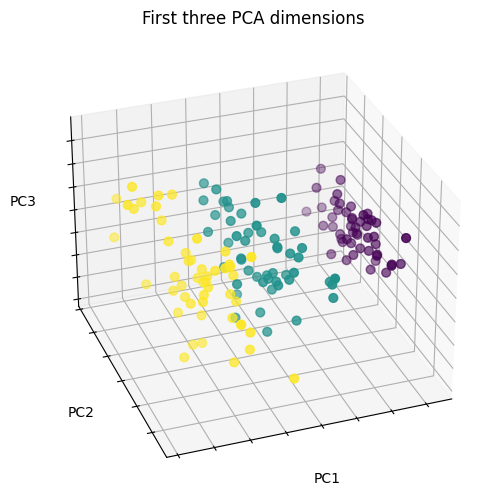

In [18]:
# Example: iris dataset
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
pca = PCA(n_components=3)
X_iris_reduced = pca.fit_transform(iris.data)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_iris_reduced[:, 0],
    X_iris_reduced[:, 1],
    X_iris_reduced[:, 2],
    c=iris.target,
    s=40,
)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PC1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.zaxis.set_ticklabels([])
plt.show()

- 各个主元所能解释的方差(对应的各个本征值)可由模型的类属性`explained_variance`或`explained_variance_ratio_`访问;
  - 由于协方差矩阵是**正定矩阵**(positive definite matrix), 则...
    - 若$M=D$, 则$\mathbf{W}^*$为正交矩阵(保迹), 各个本征值的和(主元方差和)应等于原始数据的总方差；
    - 每个本征值将捕捉总方差的一部分, 谓之“解释”.
  - 各个本征值按降序排列输出.
- 变换矩阵$\mathbf{W}^*$可由模型的类属性`components_`访问.
  - 系数反映了原特征分量与新主元分量之间的“投影”关系, 从而描述了各个主元上原特征的“组成成分”/各个特征上主元的“组成成分”.
  - 形状为`(n_components, n_features)`, 事实上为$(\mathbf{W}^*)^\mathrm{T}$. 各行按本征值降序排列输出.

In [19]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [20]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [21]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

## 非线性降维与流形学习

$\quad$为什么想要降维? 日常观察似乎表明, 多数“自然产生的”高维数据样本总存在特定的结构和规律, 这些结构只需要在较低维度下就足以描述. 例如, 手写数字6的图片包含64x64 = 4096维度的像素, 但这些像素之间高度相关, 内禀的低维结构可以(用文字)描述为“数字6”. 描述这种“结构”的数学语言是**流形**(manifold).
- 粗浅地理解, “流形”就是拥有局域“平面”结构的一个低维空间.
  - 例如: 地球表面就可以粗略地看作一个流形. 这是一个存在于三维空间中的二维曲面, 而在表面上任一点的附近一块小区域内, 地表看起来都是平坦的.
  - 称一个$d$-维空间$\mathcal{X}$为**流形**, 若对任意$x \in \mathcal{X}$都存在一个与$\mathbb{R}^d$空间(拓扑上)等价的邻域$U(x)$. 这个等价的空间$\mathbb{R}^d$称为**正切空间**(tangent space), 记作$\mathcal{T}_x := T_x\mathcal{X}$.
- **流形假设**(manifold hypothesis): 对经由自然规律产生的(高维)数据, 我们总假设它们分布于一个低维流形上.

$\quad$对数据进行非线性降维的任务往往以学习低维流形结构为目标, 因此称为**流形学习**(manifold learning). 与流形学习相关的算法封装于[`sklearn.manifold`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold)模块中. 我们本节以三维空间中的[Swiss-roll数据集](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn-datasets-make-swiss-roll)为例演示几种流形算法的学习效果. 这是一个在聚类、降维、生成模型中相当常用的作为“玩具”的人工合成数据集, 旨在定性演示与初步检查.

In [22]:
from matplotlib.ticker import NullFormatter
from sklearn.datasets import make_swiss_roll

def plot_swiss_roll_dataset(X, color, noise):
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.zaxis.set_major_formatter(NullFormatter())
    ax.set_title(f"Swiss roll dataset with noise {noise}")
    ax.axis("tight")
    plt.show()

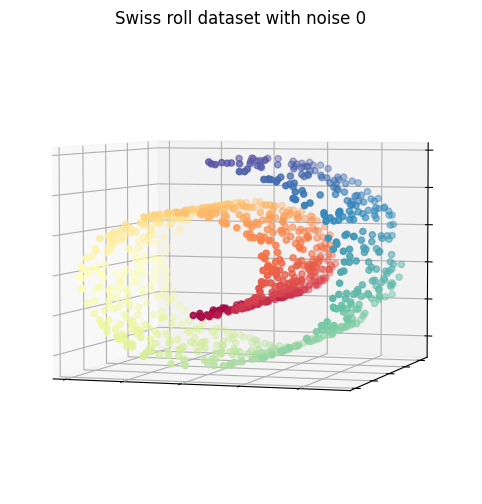

In [23]:
n_samples = 1000
X, color = make_swiss_roll(n_samples=n_samples, noise=0, random_state=42)
plot_swiss_roll_dataset(X, color, noise=0)

- 一个最早的流形学习算法为**等度量映射**(isometric mapping). 我们重新定义“距离”的度量方式: **测地线距离**(geodesic distance), 并在该距离度量下沿用类似PCA的降维算法, 使得: *学习到的低维表示尽可能保持测地线距离不变*.
  - 测地线距离定义为(带权)近邻图上的最短路径长. 它与普通Euclidean距离的最重要的区别是*考虑了曲面结构引起的互通路径变化*.
  - 两个Euclidean距离相近的点仍然可能具有很远的测地线距离, 因为它们在低维流形上需要跨越很长的距离才能互相到达.
- 等度量映射可由[`sklearn.manifold.Isomap`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn-manifold-isomap)模块实现. 调用接口仍然是`fit()`、`transform()`与组合版本`fit_transform()`.
- 等度量映射是**拓扑不稳定的**(topological instability), 原始数据上的噪声微扰很容易引起近邻图的“变形”, 从而给出不合理的结果.
  - 你可以自行尝试修改`n_neighbors`参数以减小构建近邻图时的邻居数, 但这不能很好地解决拓扑不稳定性😥, 因为学习到的流形将呈现出“彼此孤立”的若干小区域, 难以泛化.

In [24]:
def plot_learned_manifold(X_reduced, color, method, noise):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title(method + f" with noise {noise}")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
    plt.show()

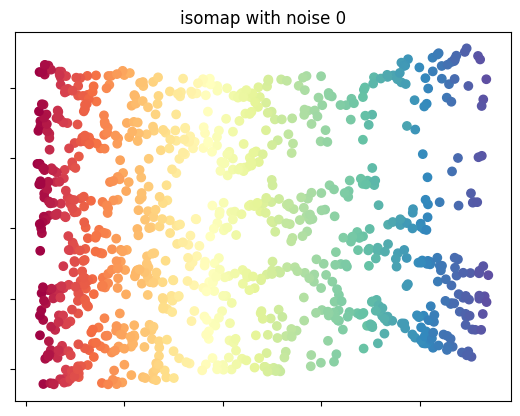

In [25]:
from sklearn.manifold import Isomap

n_neighbors, n_components = 10, 2
X_isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plot_learned_manifold(X_isomap, color, method="isomap", noise=0)

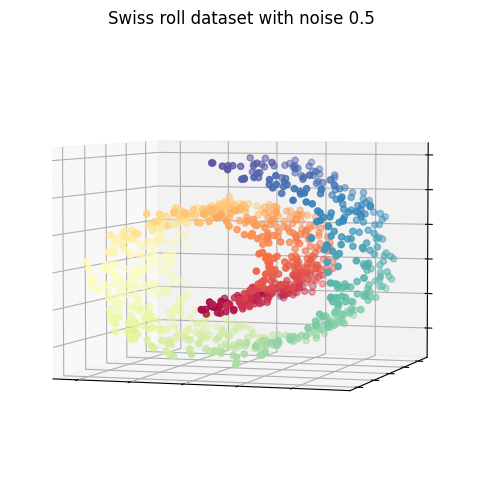

In [26]:
# topological instability example
X_noisy, color = make_swiss_roll(n_samples=n_samples, noise=0.5, random_state=42)
plot_swiss_roll_dataset(X_noisy, color, noise=0.5)

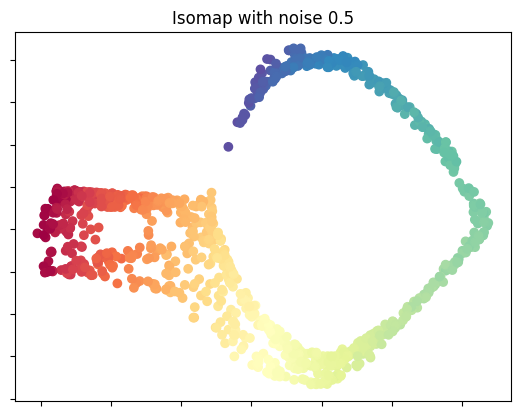

In [27]:
X_noisy_isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X_noisy)
plot_learned_manifold(X_noisy_isomap, color, method="Isomap", noise=0.5)

- SNE(stochastic neighbor embedding)算法将样本相似性建模为由Euclidean距离决定的条件概率. 常称为**亲和性**(affinity).
  - 对给定样本$i$, 其选择样本$j$作为近邻点的概率常定义为Gaussian分布:
    $$
    p_{j | i} = \frac{
    \exp{\left\{-\frac{1}{2\sigma_i^2}\|\mathbf{x}^{(i)} - \mathbf{x}^{(j)}\|^2\right\}}
    }{
    \sum_{k \ne i}{\exp{\left\{-\frac{1}{2\sigma_i^2}\|\mathbf{x}^{(i)} - \mathbf{x}^{(k)}\|^2\right\}}}
    },
    $$
    其中, $\sigma_i^2$代表样本$i$的“带宽”(band width), 代表近邻关系的容忍度($\sigma_i^2$越大, 容忍度越高, 越有可能允许较远的样本点被选为近邻点), 与“近邻数”起类似的作用.
  - 隐空间上, 我们作类似的定义:
    $$
    q_{j | i} = \frac{
    \exp{\left\{-\|\mathbf{z}^{(i)} - \mathbf{z}^{(j)}\|^2\right\}}
    }{
    \sum_{k \ne i}{\exp{\left\{-\|\mathbf{z}^{(i)} - \mathbf{z}^{(k)}\|^2\right\}}}
    },
    $$
    只不过不再引入带宽参数, 因为不同的带宽参数只是对学习到的流形结构作“缩放”, 不影响拓扑关系.
  - 一般地, SNE算法试图保持高维数据空间与低维隐空间上的亲和性, 即调整隐空间表示$\{\mathbf{z}^{(i)}\}_{i=1}^N$, 以优化各个样本的总KL散度:
    $$
    \mathcal{L} := \sum_{i=1}^N{\sum_{j=1}^N{p_{j | i}\log{\frac{p_{j | i}}{q_{j | i}}}}}.
    $$
- 通常的SNE算法面临“拥挤问题”(crowding problem). 注意隐空间的条件概率$q_{j | i}$衰减得非常快, 所以样本在低维流形上的分布将非常“拥挤”.
  - **t-SNE算法**将隐空间上的亲和性建模为“尾巴更长”、衰减更慢的[学生t分布](https://en.wikipedia.org/wiki/Student%27s_t-distribution):
    $$
    q_{j | i} = \frac{
    (1 + \|\mathbf{z}^{(i)} - \mathbf{z}^{(j)}\|^2)^{-1}
    }{
    \sum_{k \ne i}{(1 + \|\mathbf{z}^{(i)} - \mathbf{z}^{(k)}\|^2)^{-1}}
    }.
    $$
  - 以[`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)模块调用, “带宽”参数根据`perplexity`控制.
    - 不同的`perplexity`值往往会显著影响降维结果, 推荐进行多次试验.
- t-SNE算法更善于挖掘数据的局域结构, 其给出的流形结构往往呈现为**若干组彼此分隔的簇, 每个簇内样本分布得十分紧密**.
  - Isomap更适合学习单一、连续的流形结构, 例如前述的Swiss-roll数据集;
  - t-SNE更适合学习来自若干组彼此相隔较远的流形的混合数据(适合承接聚类任务作为下游), 例如手写数字图片的聚类.

c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


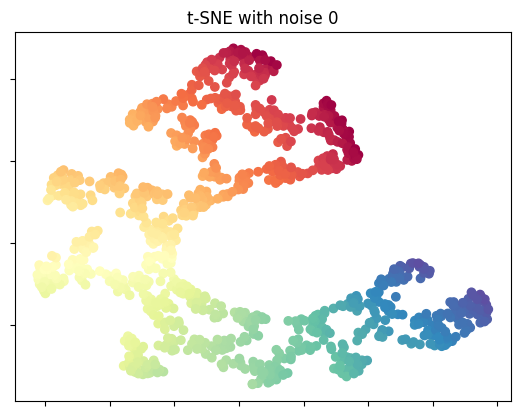

In [28]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=n_components).fit_transform(X)
plot_learned_manifold(X_tsne, color, method="t-SNE", noise=0)

c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


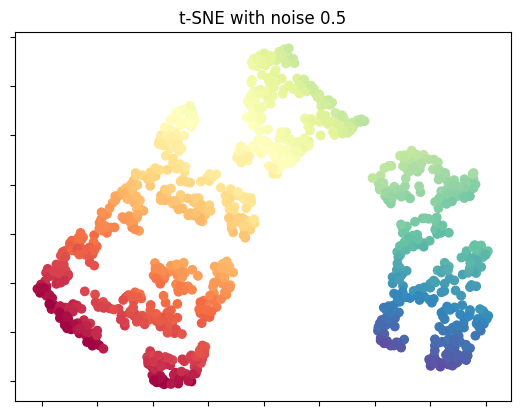

In [29]:
X_tsne_noisy = TSNE(n_components=n_components).fit_transform(X_noisy)
plot_learned_manifold(X_tsne_noisy, color, method="t-SNE", noise=0.5)

# 聚类算法

$\quad$本节我们以三个[Gaussian分布的混合数据](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn-datasets-make-blobs)进行聚类算法的演示.

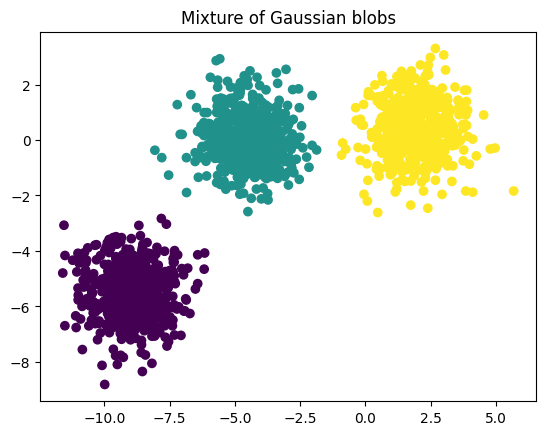

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

n_samples, random_state = 1500, 170
X_blobs, y_blobs = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.title("Mixture of Gaussian blobs")
plt.show()

## k-means方法

$\quad$考虑将$N$个样本分入$K$个**簇**(cluster)的某种方法, 使得每簇内的样本尽可能地接近簇中心$\boldsymbol{\mu}$. 我们于是可以定义下述的畸变函数作为优化目标:
$$
\mathcal{L}(\mathbf{M}, \mathbf{Z}) := \sum_{n=1}^N{\|\mathbf{x}^{(n)} - \boldsymbol{\mu}_{z_n}\|^2} = \|\mathbf{X} - \mathbf{Z}\mathbf{M}^\mathrm{T}\|_F^2,
$$
其中,
- 矩阵$\mathbf{X} \in \mathbb{R}^{N \times D}$为原始数据;
- 由簇中心组成的矩阵$\mathbf{M} \in \mathbb{R}^{D \times K}$, 第$k$列对应第$k$个簇的中心$\boldsymbol{\mu}_k$;
- 第$n$个样本的类别归属记为$z_n$, 若独热化为$\mathbf{z} \in \{0, 1\}^K$, 则可以组成矩阵$\mathbf{Z} \in \{0, 1\}^{N \times K}$.

$\quad$在k-means方法中, 我们迭代地优化目标函数$\mathcal{L}$. 每轮迭代中依次完成如下两步:
- 簇中心的计算
  $$
  \boldsymbol{\mu}_k^* = \arg{\min_{\boldsymbol{\mu}}{\sum_{n: z_n=k}{\|\mathbf{x}^{(n)} - \boldsymbol{\mu}\|^2}}} = \frac{1}{N_k}\sum_{n:z_n=k}{\mathbf{x}^{(n)}};
  $$
- 簇的分配(事实上基于贪心算法, greedy algorithm)
  $$
  z_n^* = \arg{\min_k{\|\mathbf{x}^{(n)} - \boldsymbol{\mu}_{z_n}\|^2}}.
  $$

可以证明, 以上每轮迭代都使$\mathcal{L}$单调递减, 最终收敛到一个(局部)极小点. 实践中可以多作几次初始化, 取畸变函数最小的那组解输出.

$\quad$与聚类有关的算法封装于[`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)模块中, 而调用k-means算法的接口为[`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn-cluster-kmeans). 模型创建需要传入参数`n_clusters`(默认为8), 训练用`fit()`方法, 类别标签分配为`predict()`方法.
- 簇中心由属性`cluster_centers_`访问, 这给出形状为`(n_clusters, n_features)`的矩阵;
- 训练集上各个样本的类别标签由属性`labels_`访问.

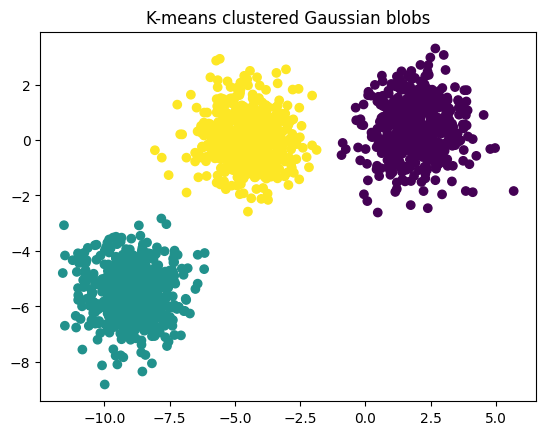

In [31]:
n_clusters = 3
y_blobs_pred = KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_pred)
plt.title("K-means clustered Gaussian blobs")
plt.show()

## 边界软化: Gaussian混合模型(GMM)

$\quad$ k-means算法事实上是**期望-最大化(Expectation-Maximization, EM)算法**的特例. EM是一种求解**考虑隐变量的极大似然估计问题**的迭代算法, 每个迭代步$t$依次完成两个子步骤:
- **期望步(E)**, 将隐变量$\mathbf{Z}$在联合分布$\{\mathbf{X}, \mathbf{Z}\}$的对数似然中约化掉:
  $$
  Q(\boldsymbol{\theta} | \boldsymbol{\theta}^{(t)}) := \mathbb{E}_{\mathbf{Z} \sim p(\cdot|\mathbf{X}, \boldsymbol{\theta}^{(t)})}[
  \log{p(\mathbf{X}, \mathbf{Z} | \boldsymbol{\theta})}];
  $$
- **最大化步**, 优化$Q$值:
  $$
  \boldsymbol{\theta}^{(t+1)} := \arg{\max_{\boldsymbol{\theta}}{Q(\boldsymbol{\theta} | \boldsymbol{\theta}^{(t)}).
  }}
  $$

可以证明, $\mathbf{X}$的对数似然函数$\log{p(\mathbf{X} | \boldsymbol{\theta}^{(t)})}$随着迭代轮次$t$的增加而单调递增. 不同的EM算法案例对应的是不同的隐变量条件分布$p(\mathbf{Z} | \mathbf{X},\boldsymbol{\theta})$. 在k-means问题中, 条件分布是“独热”的“硬”分布, 即:
$$
p\left(z_n = k \middle| \mathbf{x}^{(n)}, \{\boldsymbol{\mu}_{k'}\}_{k'=1}^K\right) = \begin{cases}
1, & k=\arg{\min_{k'}{\|\mathbf{x}^{(n)} - \boldsymbol{\mu}_{k'}\|^2}},\\
0, & \mathrm{else}.
\end{cases}
$$

$\quad$而在**Gaussian混合模型**(Gaussian mixture model, GMM)中, 我们采取“软分类”策略, 将条件分布建模为(带权)Gaussian分布:
$$
p\left(z_n = k \middle| \mathbf{x}^{(n)}, \{p_{k'}, \boldsymbol{\mu}_{k'}, \mathbf{\Sigma}_{k'}\}_{k'=1}^K\right) \propto p_k\mathcal{N}(\mathbf{x}^{(i)}|\boldsymbol{\mu}_k, \mathbf{\Sigma}_k),
$$
并以同样的迭代策略求解最优参数$\boldsymbol{\theta}^* \equiv \{p_k^*, \boldsymbol{\mu}_k^*, \mathbf{\Sigma}_k^*\}_{k=1}^K$. 相比于k-means分配簇中心的做法, GMM实质是给每个样本点分配一个Gaussian分布的归属.

$\quad$调用GMM算法的接口封装于[`sklearn.mixture.GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn-mixture-gaussianmixture), 训练与预测的接口依然为`fit()`与`predict()`. 参数`n_components`默认值为1.
- 最优参数$\{p_k^*\}$、最优均值$\{\boldsymbol{\mu}_k^*\}$、最优协方差$\{\mathbf{\Sigma}_k^*\}$分别可由属性`weights_`、`means_`、`covariances_`访问;
- 我们可以将k-means看作是GMM在各个权重$p_k$与Gaussian组分方差$\mathbf{\Sigma}_k$彼此相等时的特例. 当数据呈现各向异性时, k-means不再适用, 但GMM仍然可以考虑.

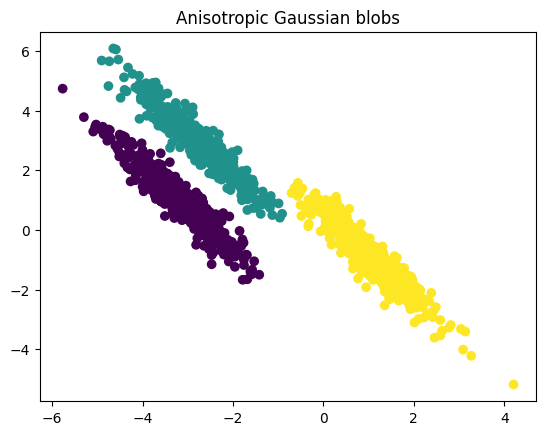

In [32]:
import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_blobs_aniso = np.dot(X_blobs, transformation)
plt.scatter(X_blobs_aniso[:, 0], X_blobs_aniso[:, 1], c=y_blobs)
plt.title("Anisotropic Gaussian blobs")
plt.show()

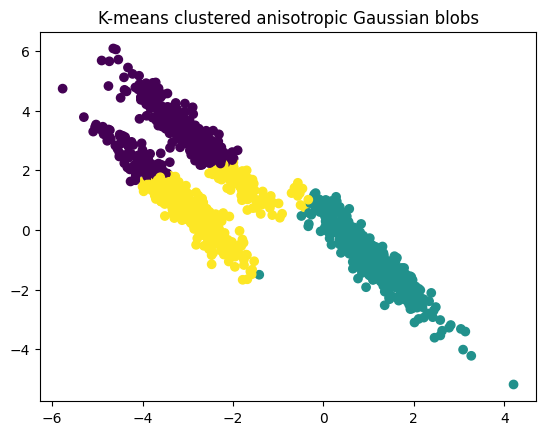

In [33]:
# bad attempt: k-means (due to anisotropic distribution of data)

y_aniso_kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(X_blobs_aniso)
plt.scatter(X_blobs_aniso[:, 0], X_blobs_aniso[:, 1], c=y_aniso_kmeans)
plt.title("K-means clustered anisotropic Gaussian blobs")
plt.show()

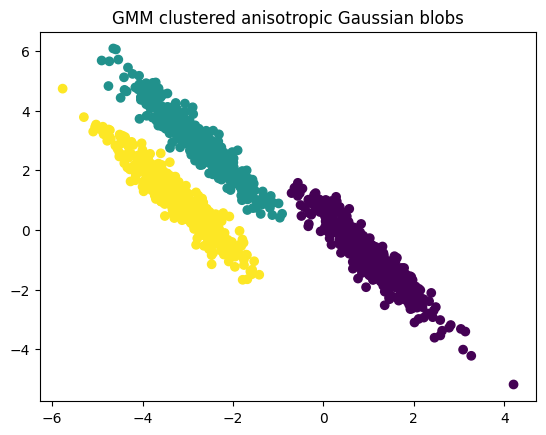

In [34]:
from sklearn.mixture import GaussianMixture

y_aniso_gmm = GaussianMixture(n_components=n_clusters, random_state=random_state).fit_predict(X_blobs_aniso)
plt.scatter(X_blobs_aniso[:, 0], X_blobs_aniso[:, 1], c=y_aniso_gmm)
plt.title("GMM clustered anisotropic Gaussian blobs")
plt.show()